In [2]:
# Importer librairies
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D  # pour le plot 3D
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.feature_selection import SelectKBest, f_classif
from classifiers.__init__ import CLASSIFIERS

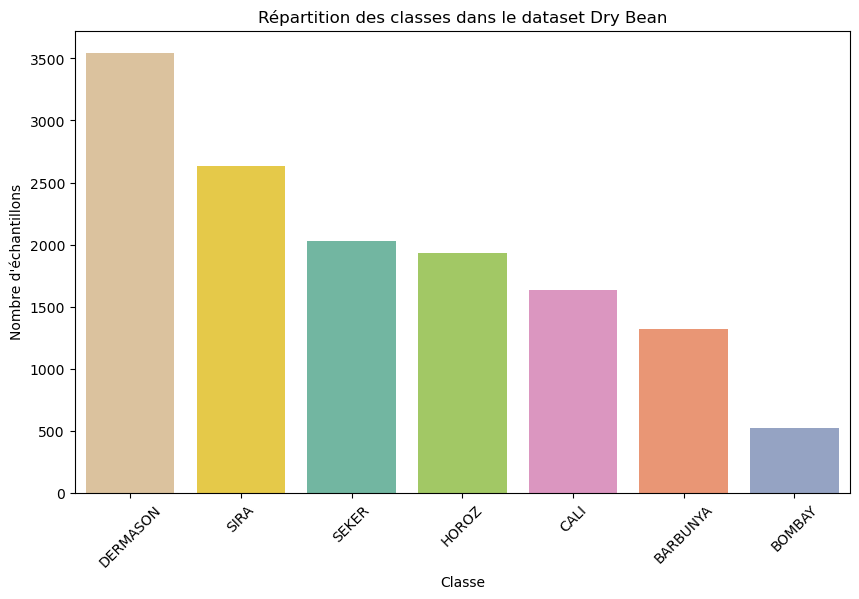

In [3]:
# Chargement et prétraitement
data = pd.read_csv("dataset/Dry_Bean_Dataset.csv")

X = data.drop("Class", axis=1)
y_raw = data["Class"]  # garder les noms pour l'affichage
y = LabelEncoder().fit_transform(data["Class"])

# Répartition des classes (analyse exploratoire)
plt.figure(figsize=(10,6))
sns.countplot(
    x="Class",
    hue="Class",
    data=data,
    order=data['Class'].value_counts().index,
    palette="Set2",
    legend=False
)
plt.title("Répartition des classes dans le dataset Dry Bean")
plt.xlabel("Classe")
plt.ylabel("Nombre d'échantillons")
plt.xticks(rotation=45)
plt.show()

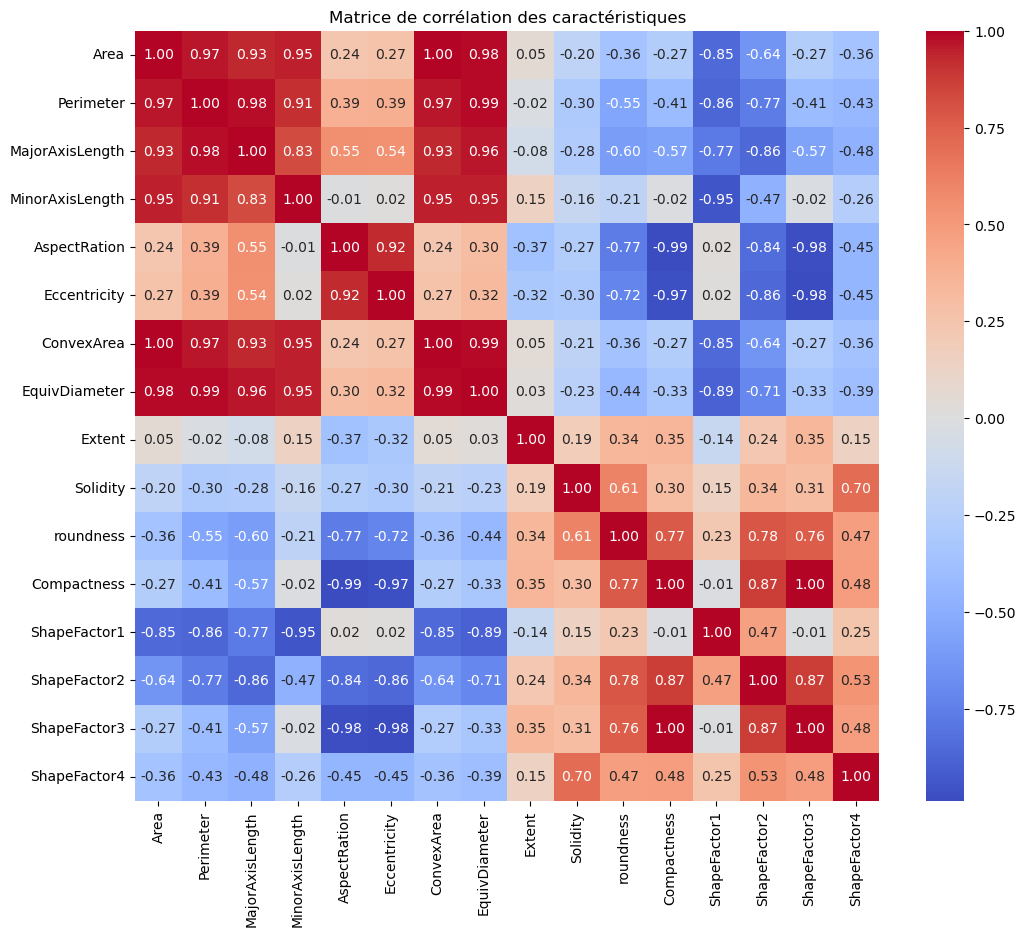

In [7]:
# Matrice de corrélation

plt.figure(figsize=(12,10))
corr_matrix = data.drop("Class", axis=1).corr()  # corrélation seulement entre features
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matrice de corrélation des caractéristiques")
plt.show()

In [6]:
# Statistiques descriptives des variables numériques
data[['Area', 'Perimeter', 'ShapeFactor3', 'ShapeFactor4']].describe().round(3)

,Area,Perimeter,ShapeFactor3,ShapeFactor4
count,13611.000,13611.000,13611.000,13611.000
mean,53048.285,855.283,0.644,0.995
std,29324.096,214.290,0.099,0.004
min,20420.000,524.736,0.410,0.948
25%,36328.000,703.524,0.581,0.994
50%,44652.000,794.941,0.642,0.996
75%,61332.000,977.213,0.696,0.998
max,254616.000,1985.370,0.975,1.000


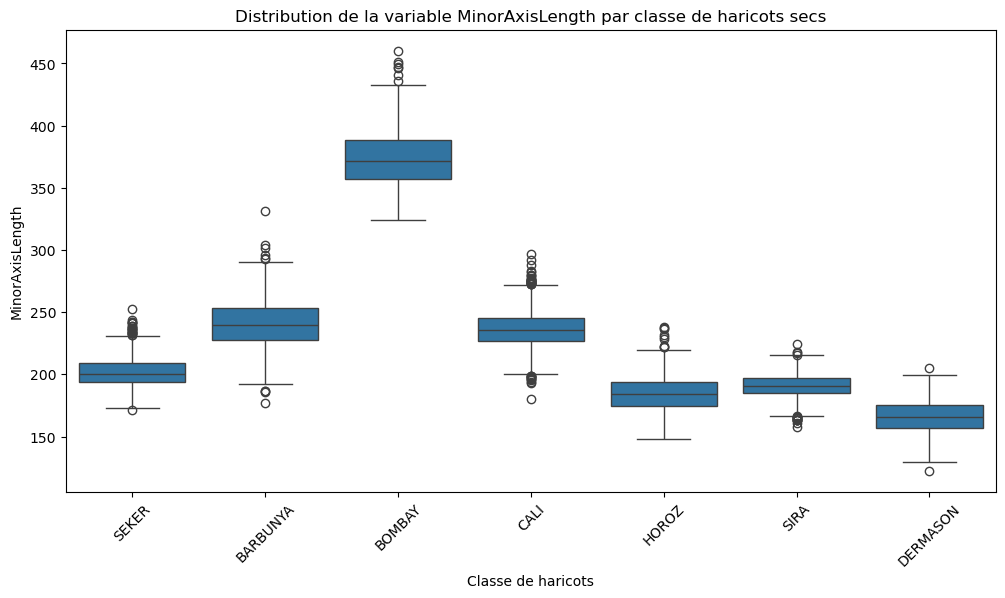

In [10]:
# Distribution de la variable MinorAxisLength par classe de haricots secs.
plt.figure(figsize=(12,6))
sns.boxplot(x="Class", y="MinorAxisLength", data=data)
plt.title("Distribution de la variable MinorAxisLength par classe de haricots secs")
plt.xlabel("Classe de haricots")
plt.ylabel("MinorAxisLength")
plt.xticks(rotation=45)
plt.show()

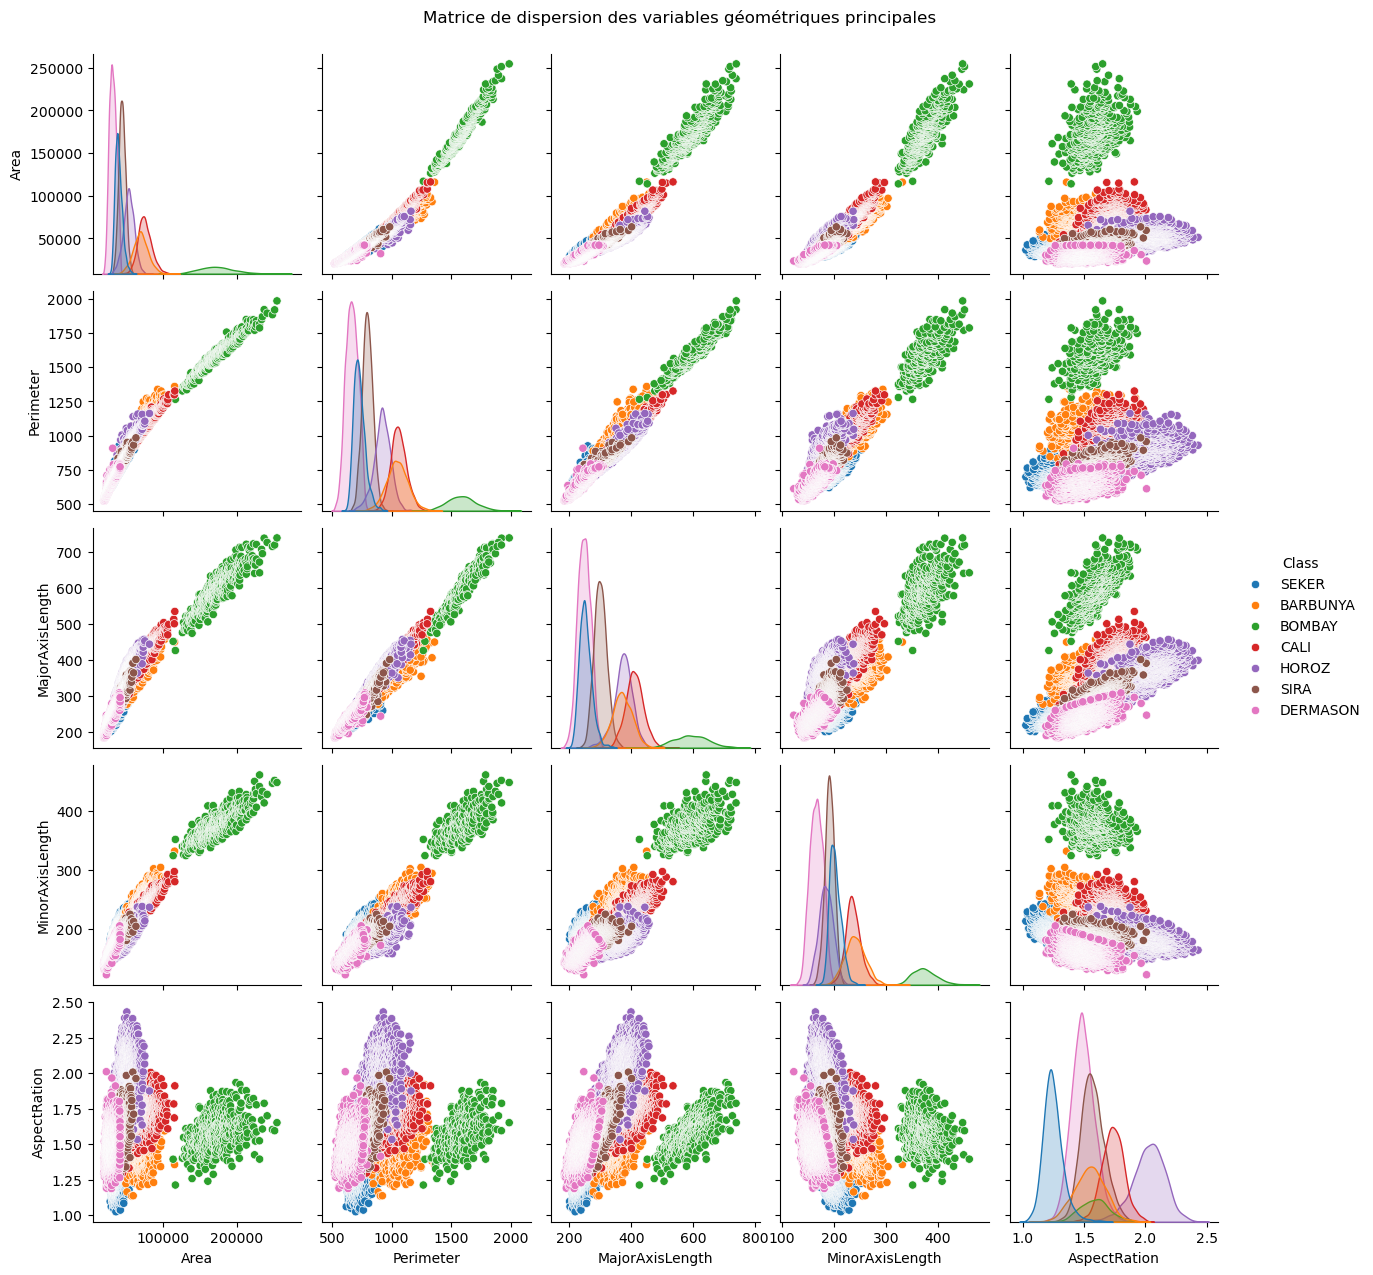

In [11]:
# Matrice de dispersion (pairplot) des variables géométriques principales.

# Sélection des variables géométriques principales
geom_features = ["Area", "Perimeter", "MajorAxisLength", "MinorAxisLength", "AspectRation"]

# Pairplot coloré selon la classe
sns.pairplot(data[geom_features + ["Class"]], hue="Class", palette="tab10", diag_kind="kde", corner=False)
plt.suptitle("Matrice de dispersion des variables géométriques principales", y=1.02)
plt.show()

In [12]:
#  Gestion des Valeurs Manquantes
# Afficher le nombre de valeurs manquantes par colonne
print(data.isnull().sum())


Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64


In [13]:
#  Normalisation
scalers = {
    'MinMaxScaler': MinMaxScaler(),
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'None': None
}

for name, scaler in scalers.items():
    X_scaled = X.copy()
    if scaler is not None:
        X_scaled = scaler.fit_transform(X)
    
    clf = RandomForestClassifier(random_state=42)
    scores = cross_val_score(clf, X_scaled, y, cv=5, scoring='accuracy')
    print(f"{name}: {np.mean(scores)*100:.1f}%")


MinMaxScaler: 61.2%
StandardScaler: 61.2%
RobustScaler: 61.2%
None: 61.1%


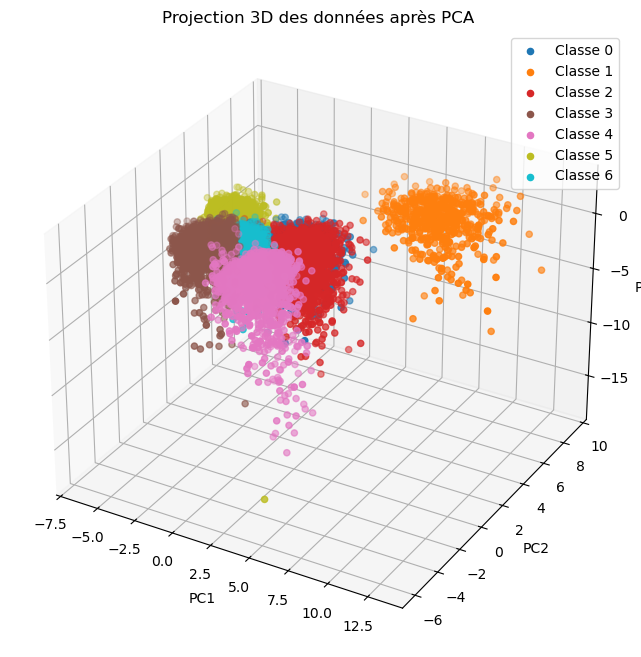

In [14]:
# Réduction de dimension à 3 composantes principales
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # normalisation

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)  # utiliser X_scaled ici !

# Associer chaque classe à une couleur
classes = np.unique(y)
colors = plt.get_cmap('tab10', len(classes))

# Créer la figure 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i, cls in enumerate(classes):
    ax.scatter(
        X_pca[y == cls, 0],
        X_pca[y == cls, 1],
        X_pca[y == cls, 2],
        label=f'Classe {cls}',
        color=colors(i)
    )

ax.set_title('Projection 3D des données après PCA')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.legend()
plt.show()


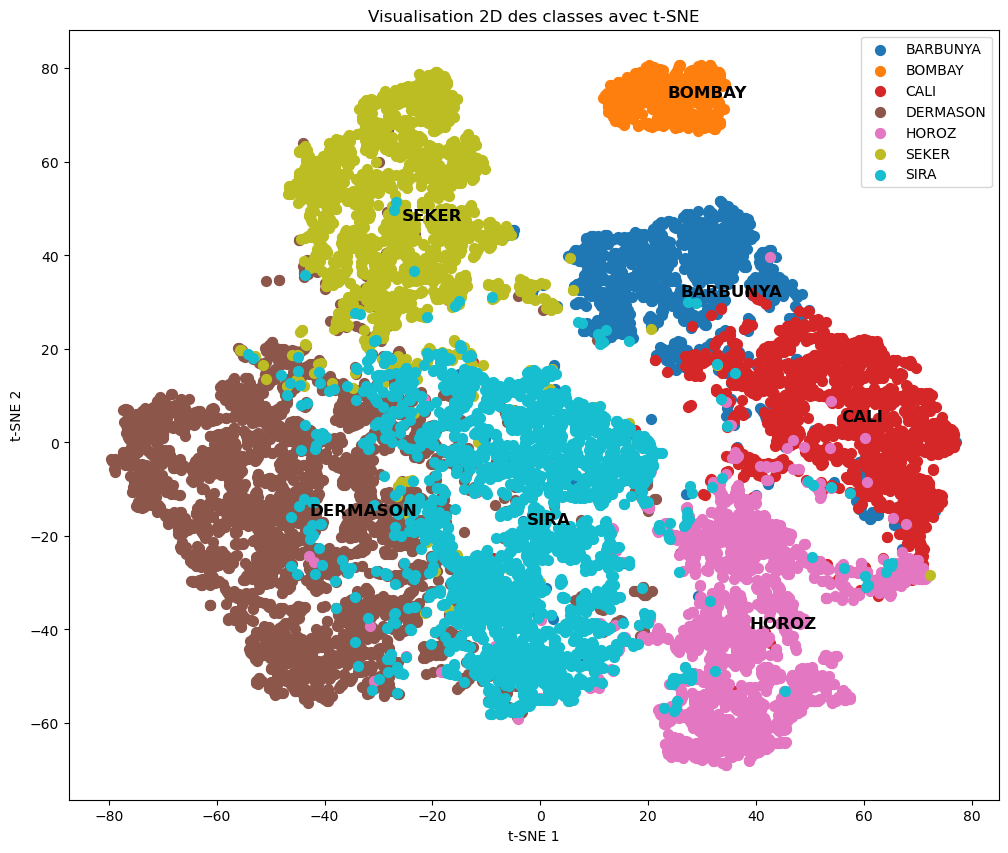

In [15]:
# Visualisations 
encoder = LabelEncoder()
y = encoder.fit_transform(data["Class"])

# t-SNE en 2D
tsne = TSNE(n_components=2, perplexity=40, learning_rate=200, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Nom des classes
class_names = encoder.inverse_transform(np.unique(y))

# Classes et couleurs
classes = np.unique(y)
colors = plt.get_cmap('tab10', len(classes))

plt.figure(figsize=(12, 10))
for i, cls in enumerate(classes):
    idx = (y == cls)
    points = X_tsne[idx]

    # Points du cluster
    plt.scatter(
        points[:, 0],
        points[:, 1],
        label=class_names[i],
        color=colors(i),
        s=50
    )

    # Nom de la classe en noir au centre du cluster
    center = points.mean(axis=0)
    plt.text(
        center[0],
        center[1],
        class_names[i],
        fontsize=12,
        weight='bold',
        color="black"    
    )

plt.title("Visualisation 2D des classes avec t-SNE")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.legend()
plt.show()


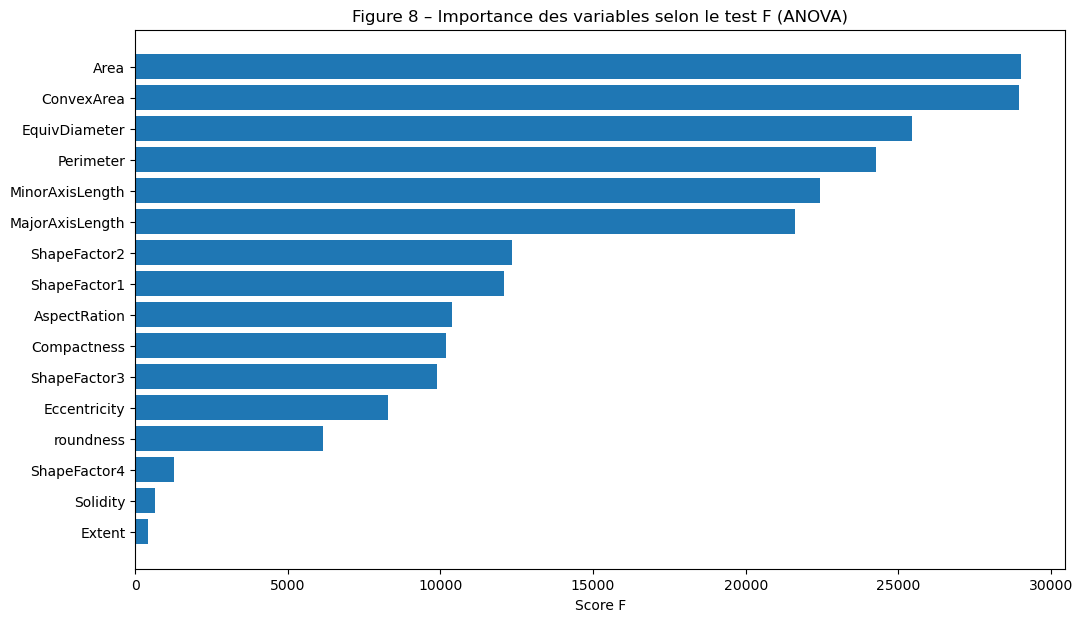

In [10]:
# === Sélection par Test F ===
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

scores = selector.scores_
feature_names = X.columns  # si X est un DataFrame Pandas

# Tri des scores pour un affichage propre
sorted_idx = np.argsort(scores)[::-1]
sorted_scores = scores[sorted_idx]
sorted_features = feature_names[sorted_idx]

plt.figure(figsize=(12, 7))
plt.barh(sorted_features, sorted_scores)
plt.xlabel("Score F")
plt.title("Figure 8 – Importance des variables selon le test F (ANOVA)")
plt.gca().invert_yaxis()  # la variable la plus importante en haut
plt.show()


In [11]:
# Entraînement 
# Split train/test et scaling
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
results = []

for Cls in CLASSIFIERS:
    clf = Cls()  # instancier le classifieur
    print(f"\n{'='*10} {Cls.__name__} {'='*10}\n")
    
    # Cross-validation
    cv_results = clf.cross_validate(X_train, y_train, cv=5)
    
    # Optimisation des hyperparamètres
    best_params = clf.optimize_hyperparameters(X_train, y_train, cv=5)
    
    # Entraînement final
    clf.train(X_train, y_train)
    
    # Évaluation sur le jeu de test
    eval_results = clf.evaluate(X_test, y_test)
    
    # Stockage des résultats
    results.append({
        'Classifier': Cls.__name__,
        'CV Accuracy': cv_results['accuracy'],
        'CV Precision': cv_results['precision'],
        'CV Recall': cv_results['recall'],
        'CV F1': cv_results['f1'],
        'Best Params': best_params,
        'Test Accuracy': eval_results['accuracy'],
        'Test Precision': eval_results['precision'],
        'Test Recall': eval_results['recall'],
        'Test F1': eval_results['f1']
    })



========== KNNClassifier ==========


Résultats de la validation croisée 5-fold pour K-Nearest Neighbors:
Accuracy: 0.9213 ± 0.0061
Precision: 0.9215 ± 0.0061
Recall: 0.9213 ± 0.0061
F1 Score: 0.9212 ± 0.0061

Recherche des meilleurs hyperparamètres pour K-Nearest Neighbors...
Meilleurs hyperparamètres trouvés: {'n_neighbors': 13, 'p': 2, 'weights': 'distance'}
Meilleur score de validation: 0.9262
Le modèle K-Nearest Neighbors a été entraîné avec succès.

Évaluation du modèle K-Nearest Neighbors
Accuracy: 0.9181
Precision: 0.9192
Recall: 0.9181
F1 Score: 0.9183

Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.95      0.94       326
           3       0.91      0.90      0.91       709
           4       0.96      0.95      0.95       386
           5       0.94      0.95      0.94       406
           6   

In [13]:
# Affichages des résultats
df_results = pd.DataFrame(results)
df_results

,Classifier,CV Accuracy,CV Precision,CV Recall,CV F1,Best Params,Test Accuracy,Test Precision,Test Recall,Test F1
0,KNNClassifier,0.921289,0.921527,0.921289,0.921222,"{'n_neighbors': 13, 'p': 2, 'weights': 'distan...",0.918105,0.919155,0.918105,0.918308
1,SVMClassifier,0.931301,0.931647,0.931301,0.931370,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",0.927286,0.927227,0.927286,0.927198
2,LRClassifier,0.924780,0.925184,0.924780,0.924869,"{'C': 100, 'max_iter': 2000, 'penalty': 'l2', ...",0.920676,0.921645,0.920676,0.920923
3,PerceptronClassifier,0.905860,0.907343,0.905860,0.905790,"{'alpha': 0.0001, 'eta0': 2.0, 'max_iter': 500...",0.897907,0.899778,0.897907,0.896522
4,MLPNetClassifier,0.934607,0.934790,0.934607,0.934601,"{'activation': 'relu', 'alpha': 0.01, 'hidden_...",0.929122,0.929192,0.929122,0.929116
5,RFClassifier,0.924780,0.924911,0.924780,0.924716,"{'criterion': 'entropy', 'max_depth': None, 'm...",0.919941,0.920120,0.919941,0.919887


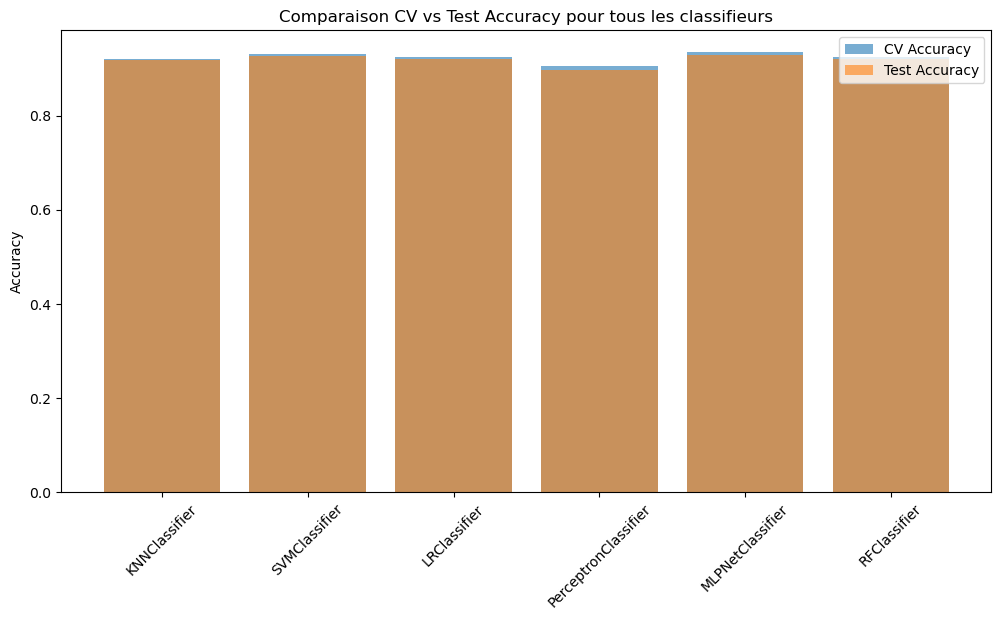

In [14]:
#Graphique comparatif : accuracy cross-validation vs test
plt.figure(figsize=(12,6))
plt.bar(df_results['Classifier'], df_results['CV Accuracy'], alpha=0.6, label='CV Accuracy')
plt.bar(df_results['Classifier'], df_results['Test Accuracy'], alpha=0.6, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.title('Comparaison CV vs Test Accuracy pour tous les classifieurs')
plt.legend()
plt.xticks(rotation=45)
plt.show()


================ KNNClassifier ================
Le modèle K-Nearest Neighbors a été entraîné avec succès.

Évaluation du modèle K-Nearest Neighbors
Accuracy: 0.9166
Precision: 0.9174
Recall: 0.9166
F1 Score: 0.9168

Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       265
           1       1.00      1.00      1.00       104
           2       0.92      0.94      0.93       326
           3       0.91      0.91      0.91       709
           4       0.95      0.95      0.95       386
           5       0.95      0.94      0.95       406
           6       0.84      0.87      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



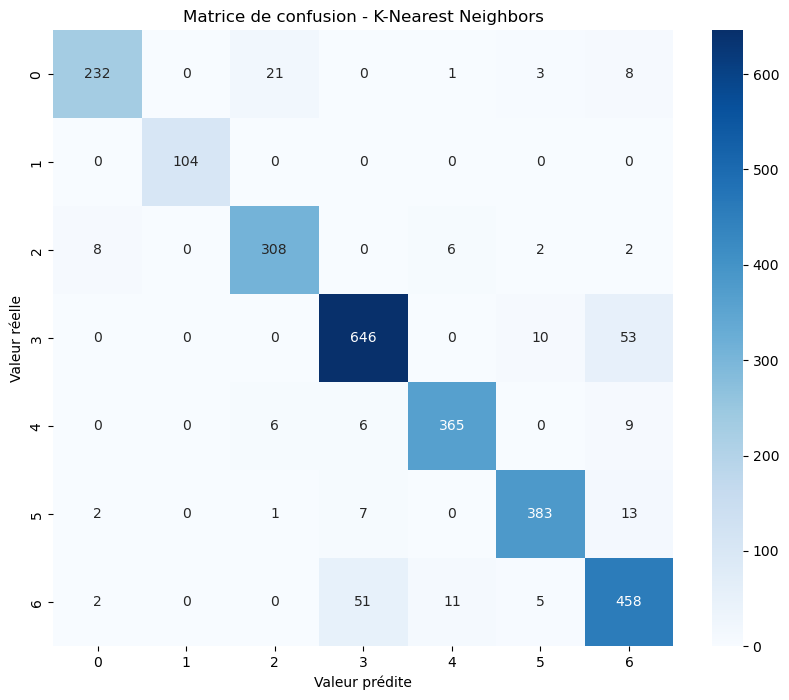

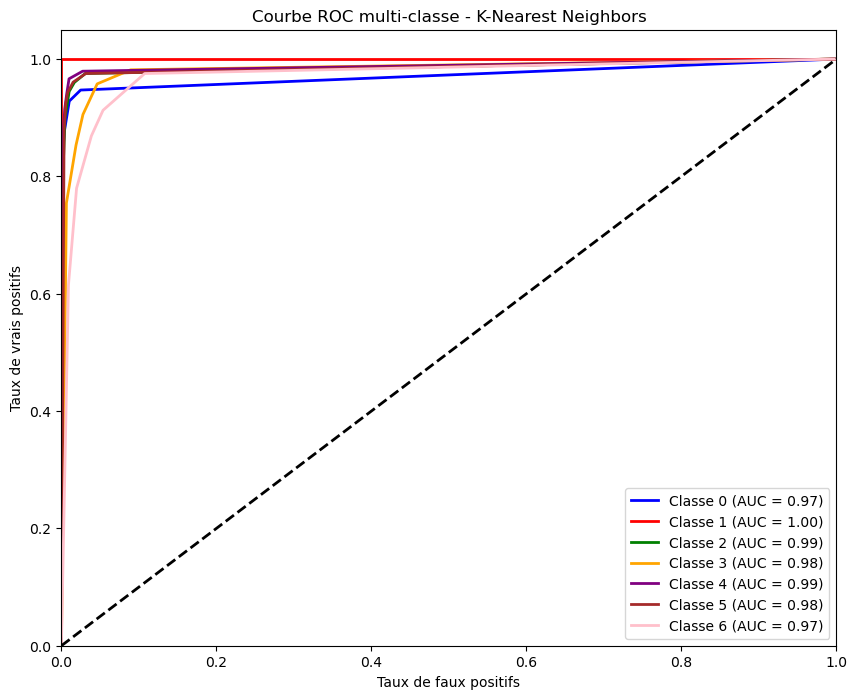

In [15]:
# ====== KNN ======
from classifiers.knn_classifier import KNNClassifier
print("\n================ KNNClassifier ================")
knn = KNNClassifier()
knn.train(X_train, y_train)
knn.evaluate(X_test, y_test)
knn.plot_confusion_matrix(X_test, y_test)
knn.plot_roc_curve(X_test, y_test)


=== RandomForest ===
Le modèle Random Forest a été entraîné avec succès.

Évaluation du modèle Random Forest
Accuracy: 0.9207
Precision: 0.9209
Recall: 0.9207
F1 Score: 0.9207

Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.94      0.89      0.92       265
           1       1.00      1.00      1.00       104
           2       0.94      0.94      0.94       326
           3       0.90      0.92      0.91       709
           4       0.97      0.95      0.96       386
           5       0.94      0.96      0.95       406
           6       0.86      0.86      0.86       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



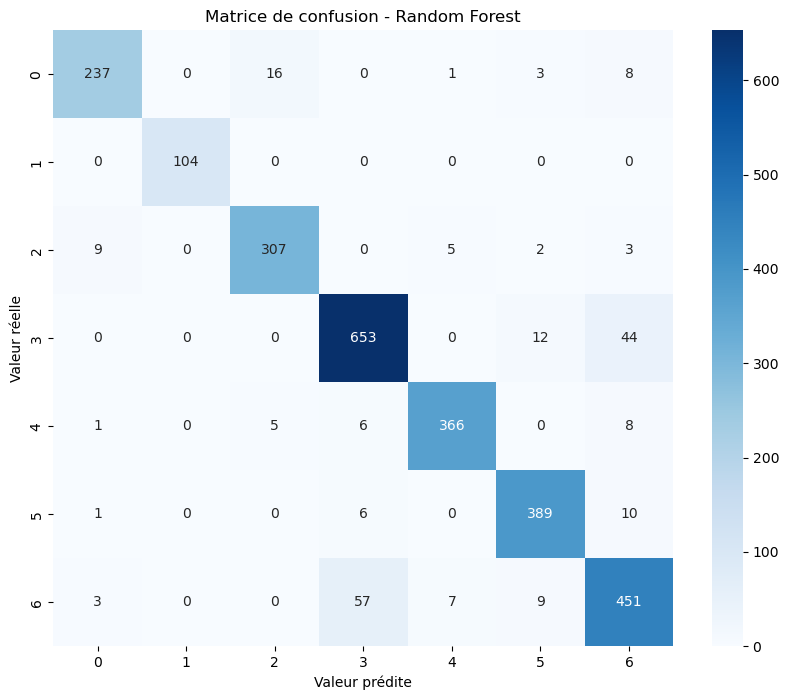

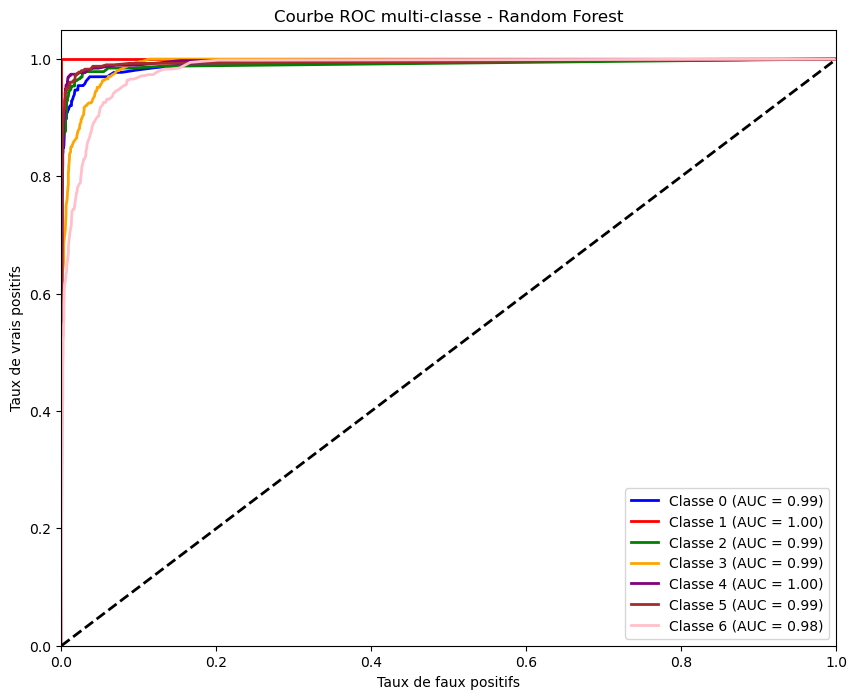

In [18]:
# ====== RandomForest ======
from classifiers.random_forest_classifier import RFClassifier
results = {}
clf = RFClassifier()
print("\n=== RandomForest ===")
clf.train(X_train, y_train)
eval_result = clf.evaluate(X_test, y_test)
clf.plot_confusion_matrix(X_test, y_test)
clf.plot_roc_curve(X_test, y_test)
results["RandomForest"] = eval_result


=== LogisticRegression ===
Le modèle Logistic Regression a été entraîné avec succès.

Évaluation du modèle Logistic Regression
Accuracy: 0.9207
Precision: 0.9215
Recall: 0.9207
F1 Score: 0.9209

Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.94      0.94       326
           3       0.92      0.91      0.92       709
           4       0.96      0.95      0.96       386
           5       0.93      0.95      0.94       406
           6       0.85      0.88      0.86       527

    accuracy                           0.92      2723
   macro avg       0.93      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



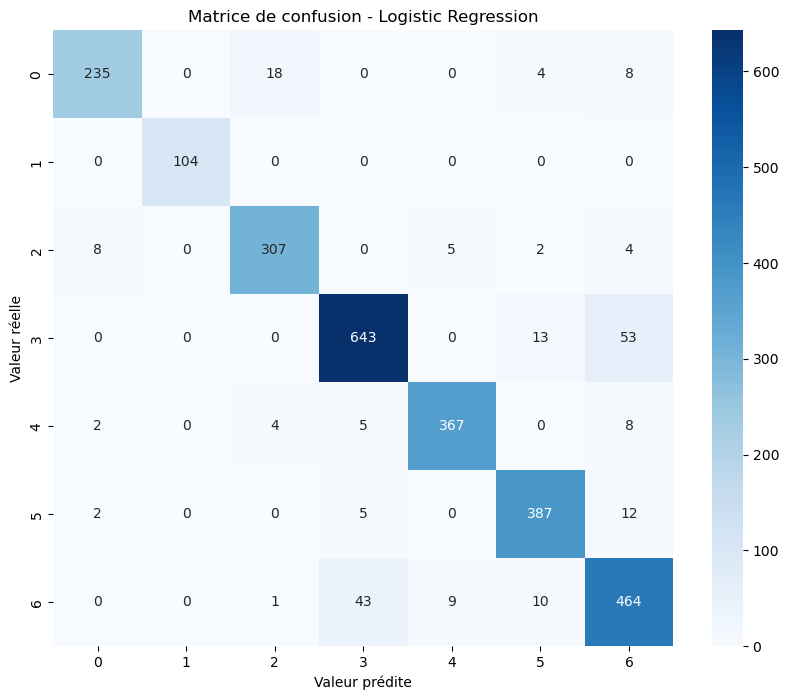

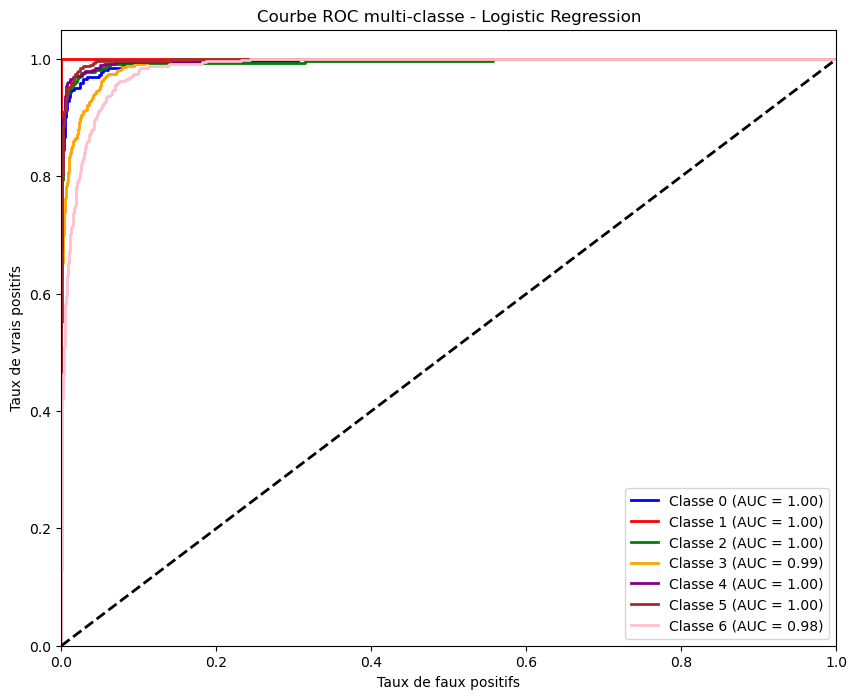

In [19]:
# ====== LogisticRegression ======
from classifiers.logistic_regression_classifier import LRClassifier
results = {}
clf = LRClassifier()
print("\n=== LogisticRegression ===")
clf.train(X_train, y_train)
eval_result = clf.evaluate(X_test, y_test)
clf.plot_confusion_matrix(X_test, y_test)
clf.plot_roc_curve(X_test, y_test)
results["LogisticRegression"] = eval_result


=== MLPClassifier ===
Le modèle Multi-Layer Perceptron a été entraîné avec succès.

Évaluation du modèle Multi-Layer Perceptron
Accuracy: 0.9280
Precision: 0.9280
Recall: 0.9280
F1 Score: 0.9278

Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.94      0.91      0.92       265
           1       1.00      1.00      1.00       104
           2       0.94      0.94      0.94       326
           3       0.90      0.94      0.92       709
           4       0.97      0.96      0.96       386
           5       0.94      0.96      0.95       406
           6       0.90      0.85      0.87       527

    accuracy                           0.93      2723
   macro avg       0.94      0.94      0.94      2723
weighted avg       0.93      0.93      0.93      2723



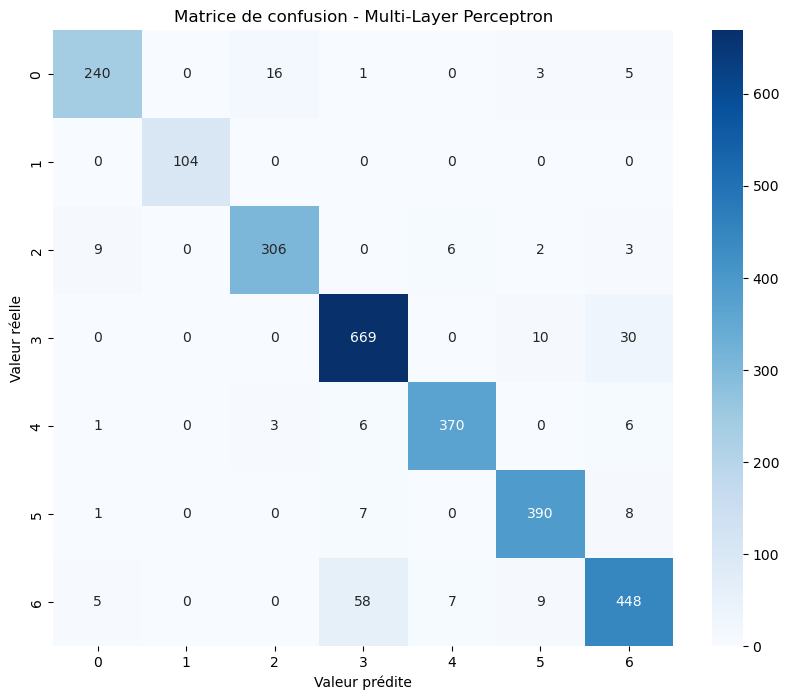

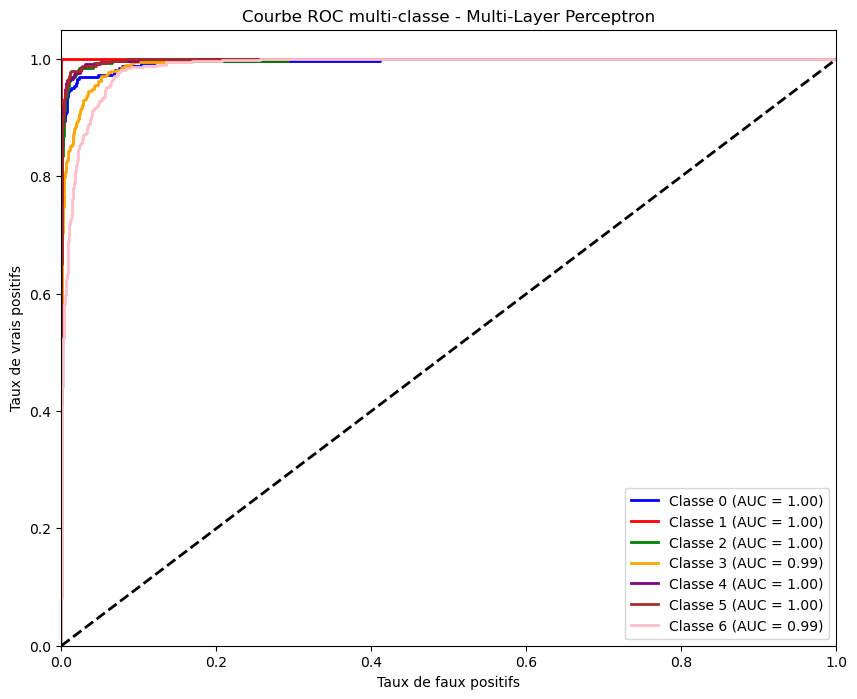

In [20]:
# ====== MLPClassifier ======
from classifiers.mlp_classifier import MLPNetClassifier
results = {}
clf = MLPNetClassifier()
print("\n=== MLPClassifier ===")
clf.train(X_train, y_train)
eval_result = clf.evaluate(X_test, y_test)
clf.plot_confusion_matrix(X_test, y_test)
clf.plot_roc_curve(X_test, y_test)
results["MLPClassifier"] = eval_result


=== SVM ===
Le modèle Support Vector Machine a été entraîné avec succès.

Évaluation du modèle Support Vector Machine
Accuracy: 0.9221
Precision: 0.9224
Recall: 0.9221
F1 Score: 0.9222

Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       265
           1       1.00      1.00      1.00       104
           2       0.93      0.95      0.94       326
           3       0.92      0.91      0.91       709
           4       0.96      0.96      0.96       386
           5       0.94      0.95      0.94       406
           6       0.86      0.87      0.87       527

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



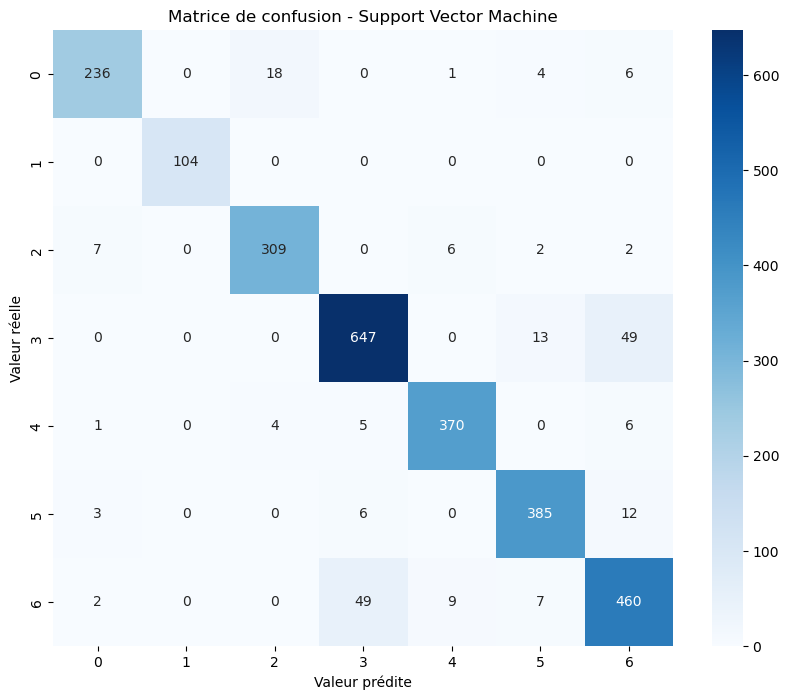

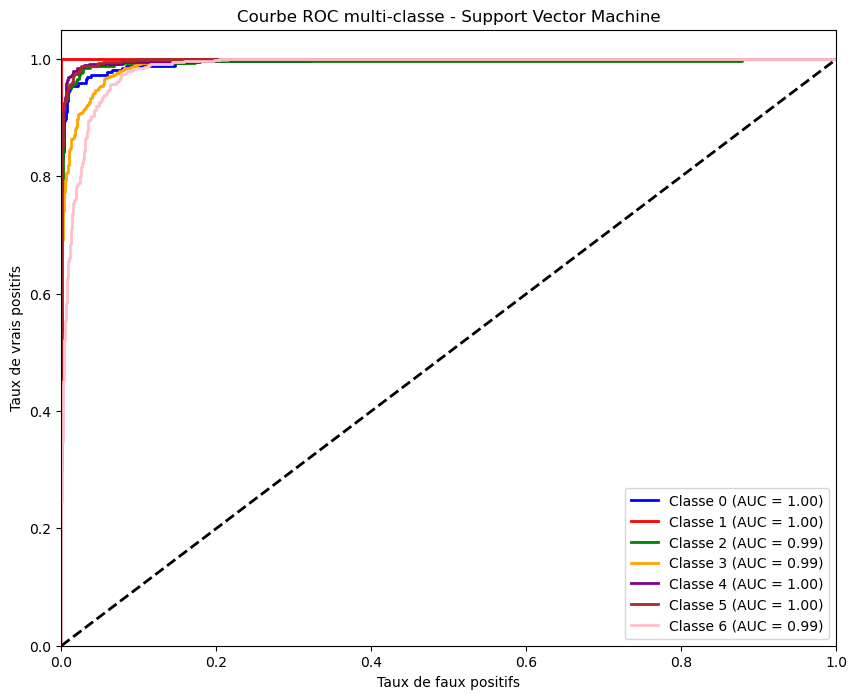

In [21]:
# ====== SVM ======
from classifiers.svm_classifier import SVMClassifier
results = {}
clf = SVMClassifier(probability=True)  # IMPORTANT : probability=True sinon pas de ROC
print("\n=== SVM ===")
clf.train(X_train, y_train)
eval_result = clf.evaluate(X_test, y_test)
clf.plot_confusion_matrix(X_test, y_test)
clf.plot_roc_curve(X_test, y_test)
results["SVM"] = eval_result


=== Perceptron ===
Le modèle Perceptron a été entraîné avec succès.

Évaluation du modèle Perceptron
Accuracy: 0.8983
Precision: 0.9000
Recall: 0.8983
F1 Score: 0.8968

Rapport de classification détaillé:
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       265
           1       1.00      1.00      1.00       104
           2       0.92      0.92      0.92       326
           3       0.85      0.95      0.90       709
           4       0.93      0.92      0.92       386
           5       0.95      0.93      0.94       406
           6       0.89      0.74      0.81       527

    accuracy                           0.90      2723
   macro avg       0.92      0.91      0.91      2723
weighted avg       0.90      0.90      0.90      2723



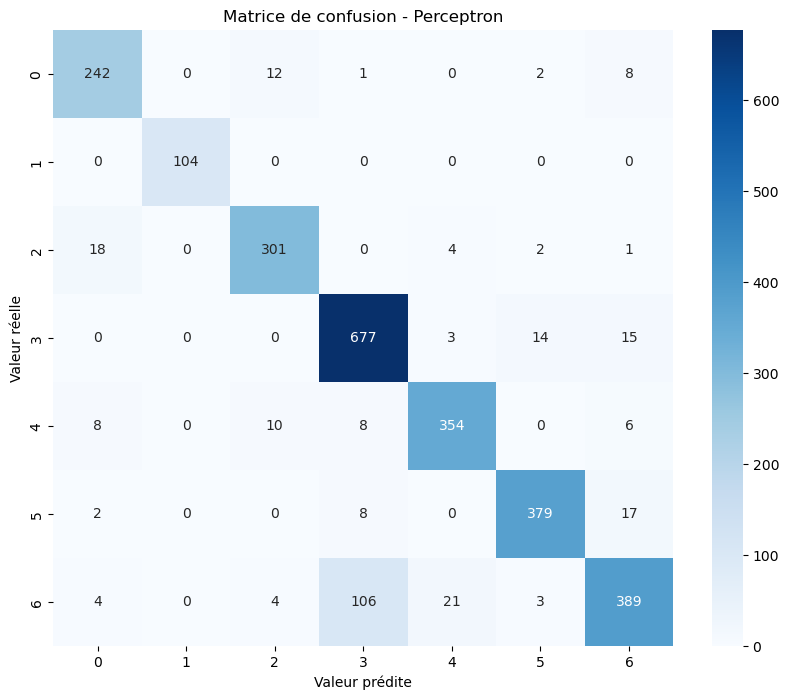

Le modèle Perceptron ne prend pas en charge le calcul des probabilités, impossible de tracer la courbe ROC.


In [22]:
# ====== Perceptron ======
from classifiers.perceptron_classifier import PerceptronClassifier
results = {}
clf = PerceptronClassifier()
print("\n=== Perceptron ===")
clf.train(X_train, y_train)
eval_result = clf.evaluate(X_test, y_test)
clf.plot_confusion_matrix(X_test, y_test)

# Perceptron n’a PAS predict_proba → pas de ROC
try:
    clf.plot_roc_curve(X_test, y_test)
except:
    print(" ROC non disponible pour Perceptron (pas de predict_proba).")

results["Perceptron"] = eval_result